## Import everything we need

In [1]:
import matplotlib.pyplot as plt
import csv

## Set up our data

We start by bringing in CSV data into our Python program. We then parse the data using the CSV package. Lastly, we close the csv file after we have read the information.

In [2]:
with open('./data/ramen-ratings.csv', 'r', encoding="utf8") as datafile:
    ramen_ratings = csv.DictReader(datafile)
    data_list = []
    
    for row in ramen_ratings:
        data_list.append(row)

In [3]:
data_list[0]

{'Review #': '2580',
 'Brand': 'New Touch',
 'Variety': "T's Restaurant Tantanmen",
 'Style': 'Cup',
 'Country': 'Japan',
 'Stars': '3.75',
 'Top Ten': ''}

## Rating frequency

The first insight we will look at is how often each rating is used

In [4]:
ratings = [0, 0, 0, 0, 0, 0]

for rating in data_list:
    try:
        if int(float(rating['Stars'])) == 0:
            ratings[0] += 1
        elif int(float(rating['Stars'])) == 1:
            ratings[1] += 1
        elif int(float(rating['Stars'])) == 2:
            ratings[2] += 1
        elif int(float(rating['Stars'])) == 3:
            ratings[3] += 1
        elif int(float(rating['Stars'])) == 4:
            ratings[4] += 1
        elif int(float(rating['Stars'])) == 5:
            ratings[5] += 1
    except:
        pass
    
print(ratings)

[54, 103, 250, 1043, 741, 386]


## Ramen by Country

Loop through all of the ratings and collect data grouped by country, containing:
1. Total Reviews
2. Total Stars

We will use this data later to display information

In [5]:
country_count = {}

for rating in data_list:
    try:
        if not country_count.get(rating['Country']):
            if rating['Country'] == 'United States':
                country_count['USA'] = {
                    'count': 1,
                    'total_stars': float(rating['Stars'])
                }
            else:
                country_count[rating['Country']] = {
                    'count': 1,
                    'total_stars': float(rating['Stars'])
                }
        else:
            if rating['Country'] == 'United States':
                country_count['USA']['count'] += 1
                country_count['USA']['total_stars'] += float(rating['Stars'])
            else:
                country_count[rating['Country']]['count'] += 1
                country_count[rating['Country']]['total_stars'] += float(rating['Stars'])
    except:
        pass

country_count['Other'] = {
    'count': 0,
    'total_stars': 0
}

for key, country in country_count.items():
    if country['count'] < 100:
        country_count['Other']['count'] += country['count']
        country_count['Other']['total_stars'] += country['total_stars']
        country_count[key]['count'] = 0
        
country_count = {key:val for key, val in country_count.items() if val['count'] != 0}

print(country_count)
    

{'Japan': {'count': 352, 'total_stars': 1401.525}, 'Taiwan': {'count': 224, 'total_stars': 821.0500000000001}, 'USA': {'count': 273, 'total_stars': 936.625}, 'South Korea': {'count': 309, 'total_stars': 1163.6999999999998}, 'Singapore': {'count': 109, 'total_stars': 449.75}, 'Thailand': {'count': 191, 'total_stars': 646.5000000000001}, 'Hong Kong': {'count': 137, 'total_stars': 520.85}, 'Vietnam': {'count': 108, 'total_stars': 344.3}, 'Malaysia': {'count': 156, 'total_stars': 643.9}, 'Indonesia': {'count': 126, 'total_stars': 512.5}, 'China': {'count': 169, 'total_stars': 578.3}, 'Other': {'count': 375, 'total_stars': 1215.35}}


## Ramen by Brand

Loop through all of the ratings and collect data grouped by brand, containing:
1. Total Reviews
2. Total Stars

We will use this data later to display information

In [6]:
brand_count = {}

for rating in data_list:
    try:
        if not brand_count.get(rating['Brand']):
            brand_count[rating['Brand']] = {
                'count': 1,
                'total_stars': float(rating['Stars'])
            }
        else:
                brand_count[rating['Brand']]['count'] += 1
                brand_count[rating['Brand']]['total_stars'] += float(rating['Stars'])
    except:
        pass

brand_count['Other'] = {
    'count': 0,
    'total_stars': 0
}

for key, brand in brand_count.items():
    if brand['count'] < 30:
        brand_count['Other']['count'] += brand['count']
        brand_count['Other']['total_stars'] += brand['total_stars']
        brand_count[key]['count'] = 0
        
brand_count = {key:val for key, val in brand_count.items() if val['count'] != 0}

print(brand_count)
    

{'Nissin': {'count': 381, 'total_stars': 1492.975}, 'Samyang Foods': {'count': 52, 'total_stars': 207.5}, 'Nongshim': {'count': 98, 'total_stars': 392.0}, 'Paldo': {'count': 66, 'total_stars': 265.25}, 'Ottogi': {'count': 45, 'total_stars': 152.75}, 'Maruchan': {'count': 76, 'total_stars': 270.125}, 'Maggi': {'count': 30, 'total_stars': 110.4}, 'Indomie': {'count': 53, 'total_stars': 215.75}, 'Myojo': {'count': 63, 'total_stars': 239.5}, 'Vifon': {'count': 33, 'total_stars': 100.8}, 'Mama': {'count': 71, 'total_stars': 257.65}, 'Vina Acecook': {'count': 34, 'total_stars': 120.25}, 'Lucky Me!': {'count': 34, 'total_stars': 112.0}, 'Other': {'count': 1543, 'total_stars': 5481.150000000001}}


## Ramen by Style

Loop through all of the ratings and collect data grouped by style, containing:
1. Total Reviews
2. Total Stars

We will use this data later to display information

In [18]:
style_count = {}

for rating in data_list:
    try:
        if not style_count.get(rating['Style']):
            style_count[rating['Style']] = {
                'count': 1,
                'total_stars': float(rating['Stars'])
            }
        else:
                style_count[rating['Style']]['count'] += 1
                style_count[rating['Style']]['total_stars'] += float(rating['Stars'])
    except:
        pass

style_count['Other'] = {
    'count': 0,
    'total_stars': 0
}

for key, style in style_count.items():
    if style['count'] < 30:
        style_count['Other']['count'] += style['count']
        style_count['Other']['total_stars'] += style['total_stars']
        style_count[key]['count'] = 0
        
style_count = {key:val for key, val in style_count.items() if val['count'] != 0}

print(style_count)

{'Cup': {'count': 450, 'total_stars': 1574.3249999999998}, 'Pack': {'count': 1531, 'total_stars': 5654.300000000001}, 'Tray': {'count': 108, 'total_stars': 382.875}, 'Bowl': {'count': 481, 'total_stars': 1765.6}}


## Time to graph

We will now use the data we have collected to display useful graphs and charts.

#### The first graph we will display is a bar graph of the distribution of ratings

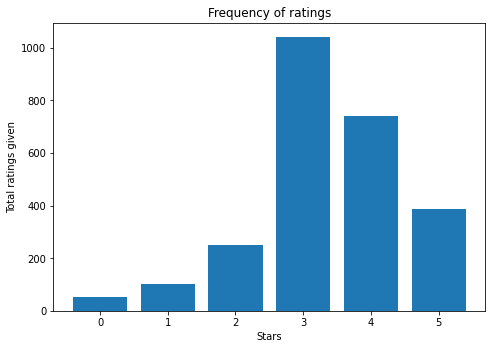

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
stars = ['0', '1', '2', '3', '4', '5']
ax.bar(stars,ratings)
ax.set_title('Frequency of ratings')
ax.set_ylabel('Total ratings given')
ax.set_xlabel('Stars')
plt.show()

#### Next we will display graphs for the countries, a pie chart showing ramen distribution and a bar graph showing the average rating for each country

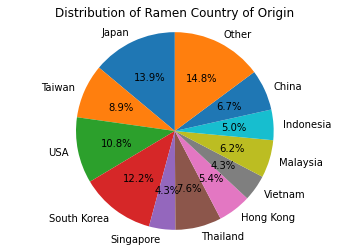

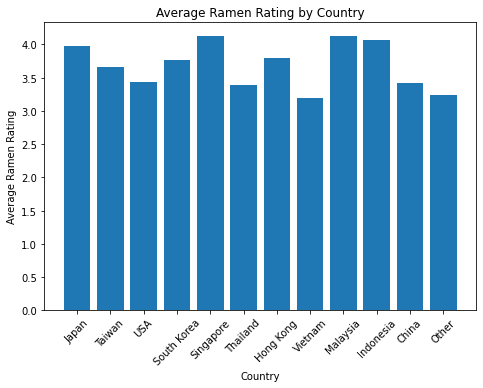

In [16]:
countries = []
count = []
avg_stars = []

for key, value in country_count.items():
    countries.append(key)
    count.append(value['count'])
    avg_stars.append(float(value['total_stars']) / float(value['count']))
    
fig1, ax1 = plt.subplots()
ax1.pie(count, labels=countries, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of Ramen Country of Origin")

plt.show()

fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.bar(countries,avg_stars)
ax2.set_title('Average Ramen Rating by Country')
ax2.set_ylabel('Average Ramen Rating')
ax2.set_xlabel('Country')
plt.xticks(rotation=45)

plt.show()

#### Next, we will show the same graphs for the brands

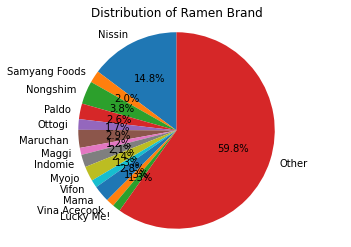

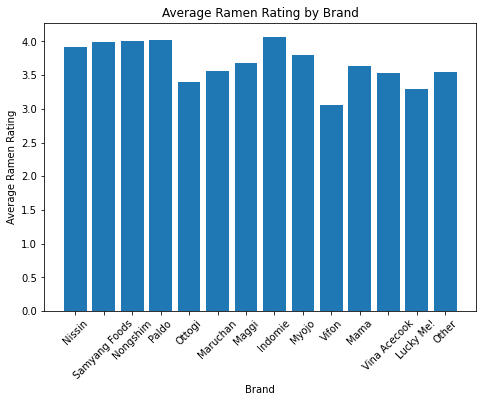

In [19]:
brands = []
count = []
avg_stars = []

for key, value in brand_count.items():
    brands.append(key)
    count.append(value['count'])
    avg_stars.append(float(value['total_stars']) / float(value['count']))
    
fig1, ax1 = plt.subplots()
ax1.pie(count, labels=brands, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of Ramen Brand")

plt.show()    

fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.bar(brands,avg_stars)
ax2.set_title('Average Ramen Rating by Brand')
ax2.set_ylabel('Average Ramen Rating')
ax2.set_xlabel('Brand')
plt.xticks(rotation=45)

plt.show()

#### Lastly, we will show these same graphs for the ramen style

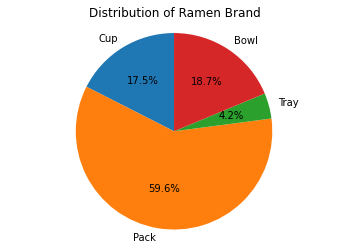

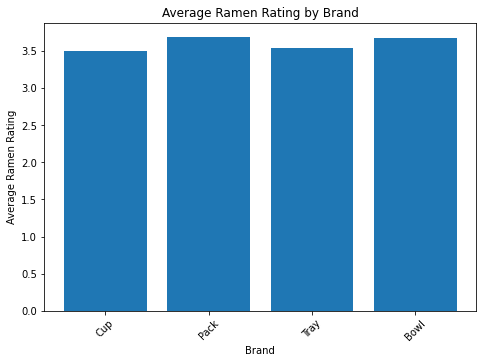

In [20]:
styles = []
count = []
avg_stars = []

for key, value in style_count.items():
    styles.append(key)
    count.append(value['count'])
    avg_stars.append(float(value['total_stars']) / float(value['count']))
    
fig1, ax1 = plt.subplots()
ax1.pie(count, labels=styles, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of Ramen Brand")

plt.show()    

fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.bar(styles,avg_stars)
ax2.set_title('Average Ramen Rating by Brand')
ax2.set_ylabel('Average Ramen Rating')
ax2.set_xlabel('Brand')
plt.xticks(rotation=45)

plt.show()